# Introduction

We've collected our data from Zillow, a reputable source that provides us with valuable information about different types of houses, their price histories over the last 7 years, and where they're located.
In the real estate market, both buyers and sellers face challenges in accurately determining the value of a property. Mispricing can lead to lost opportunities: a house priced too high might remain on the market without interest, while one priced too low might result in a financial loss for the seller. Moreover, real estate professionals, such as agents and brokers, also require accurate price estimates to effectively serve their clients and make informed decisions. In the same way, tenants looking to move into a new home need a reliable estimate to guide their decision-making and negotiations with real estate agents

### Modifications post pitch:

 We tossed in some extra datasets into the report after the presentation for a clearer picture.Now, the report has a lot more information, making it more complete and helpful for analysis.

# Data

The datasets that have been used here are collected from Zillow,few other datasets are from St.louis federal reserve.Some of the
federal reserve datsets are inflation measure,rental vacancy rate(quarterly)-percentage of rental properties that are vacant ,mortgage interest rates(weekly), where as from zillow we use datasets like median sale price for US houses and Zillow home value index.
Now after reading datasets the next step is to preprocess the data.So,to preprocess the data first we need to load the data.Initially we will load data
from federal reserve datasets by reading the csv files

In [123]:
import pandas as pd

data_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in data_files]

In [124]:
dfs[0]
#Mortgage interest rates

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [125]:
dfs[1]
#rental vacancy properties(quarterly)

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


The next step is to concatenate the data such that all three datasets would be in a single dataframe

In [126]:
data_files = pd.concat(dfs, axis=1)

In [127]:
data_files

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-07-14,5.51,NaN,NaN
2022-07-21,5.54,NaN,NaN
2022-07-28,5.30,NaN,NaN


From the above result,we can clearly see that there are some missing values from the dataset.The presence of missing values makes
the results less efficient.So,to overcome this problem we will fill the missing values in the dataset with the help of forward fill function.
Forward fill function is used here because we only want to use the data that is already known.

In [128]:
data_files = data_files.ffill().dropna()

In [129]:
data_files

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2022-07-14,5.51,5.6,295.271
2022-07-21,5.54,5.6,295.271
2022-07-28,5.30,5.6,295.271


Next step is to load the data from Zillow 'i.e' read the datasets from zillow

In [130]:
zillow_df = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

dfs = [pd.read_csv(f) for f in zillow_df]

In [131]:
dfs[0]
#Median sale prices for US houses

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [132]:
dfs[1]
#Zillow home value index

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,108641.264685,108472.728880,108532.280074,108739.077466,108986.621607,...,318648.557319,322227.276010,327377.250887,332206.790140,338002.747686,344042.433111,350515.841789,354717.722904,357473.327397,357107.271636
1,394913,1,"New York, NY",Msa,NY,188550.306900,186833.460516,186448.089063,186132.003064,186023.979536,...,573099.183713,575351.020713,577891.698212,582902.117225,588521.056859,598696.268370,607668.479848,615457.379763,619722.310507,621307.894902
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186683.041088,186015.165187,185723.797105,185700.155256,185569.298179,...,854076.999683,862487.347366,874894.413168,888106.123973,902359.871460,931407.638755,950811.533011,955845.190020,933648.296046,929753.425908
3,394463,3,"Chicago, IL",Msa,IL,147341.931571,147341.152880,146420.379418,147841.918776,148371.389735,...,288899.103704,290304.887853,291998.702189,294814.368208,298667.824107,304076.779527,308802.105551,314032.378286,315084.424557,314178.550606
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,113283.512989,113199.113561,113519.423633,114048.064719,114287.444295,...,338187.525418,344409.906452,351186.037787,359878.893639,370452.369604,376522.090399,391696.585402,399613.324087,401254.775442,396903.773679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92899.038250,92999.754549,97296.415265,98217.639150,100010.331287,101084.700150,101376.966610,103321.694906,105794.451088,106244.149398
909,753874,930,"Craig, CO",Msa,CO,66532.401041,66795.083062,67178.691523,67680.532389,67149.040671,...,244845.354879,245187.643589,253767.119261,254926.311559,253700.139970,255387.314731,254937.506748,256166.409003,266655.039121,268370.634013
910,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,169404.973627,171295.739580,178176.871040,178929.217811,179113.938659,181811.015503,184752.025925,187573.847282,192967.342193,193366.794326
911,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80043.974772,80196.507293,NaN,86966.994296,88535.643138,88556.495891,88921.719463,89261.931509,92129.408692,93197.602418


Now here we are collecting only data from the first row, as we are interested only in finding out about region name united states and also considering the columns regarding months so that we will only have weekly sales price data.
Next step we will create a loop to combine both the datsets, With the help of pandas we will convert the weekly data into monthly data by removing weekly column such that both the datas can be combined.

In [133]:
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [134]:
dfs[0]

,0,month
2008-02-02,190000.0,2008-02
2008-02-09,190000.0,2008-02
2008-02-16,193000.0,2008-02
2008-02-23,189900.0,2008-02
2008-03-01,194900.0,2008-03
...,...,...
2022-06-11,370000.0,2022-06
2022-06-18,375000.0,2022-06
2022-06-25,370000.0,2022-06
2022-07-02,370000.0,2022-07


In [135]:
price_data = dfs[0].merge(dfs[1], on="month")

In [136]:
price_data.index = dfs[0].index

So now we get the average sales price for each house(0_x), average value for a house(0_y)

In [137]:
price_data

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952
...,...,...,...
2022-06-11,370000.0,2022-06,357473.327397
2022-06-18,375000.0,2022-06,357473.327397
2022-06-25,370000.0,2022-06,357473.327397
2022-07-02,370000.0,2022-07,357107.271636


In [138]:
del price_data["month"]
price_data.columns = ["price", "value"]

In [139]:
price_data

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


### Preparing data for machine learning

The goal here is to merge the zillow datasets into the federal reserva data.
To obtain this we should drop the missing values from federal data
And to align the federal data with zillow data we add 2 days to federal data

In [140]:
from datetime import timedelta

data_files.index = data_files.index + timedelta(days=2)

In [141]:
data_files.tail(10)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-06-18,5.78,5.6,295.328
2022-06-25,5.81,5.6,295.328
2022-07-02,5.70,5.6,295.328
2022-07-03,5.70,5.6,295.271
2022-07-09,5.30,5.6,295.271
2022-07-16,5.51,5.6,295.271
2022-07-23,5.54,5.6,295.271
2022-07-30,5.30,5.6,295.271
2022-08-06,4.99,5.6,295.271


since now both the data sets are aligned, we will merge them .

In [142]:
price_data = data_files.merge(price_data, left_index=True, right_index=True)

In [143]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


In [144]:
price_data.columns = ["interest", "vacancy", "cpi", "price", "value"]

In [145]:
price_data

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


#### Exploring our data

Now we are plotting a graph that shows the house prices of U.S to understand our data

<Axes: >

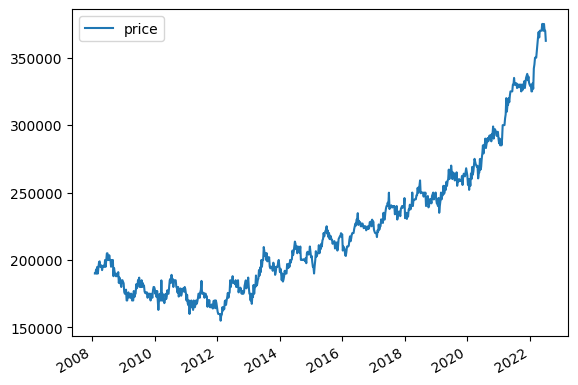

In [146]:
price_data.plot.line(y="price", use_index=True)

Now from the graph we can say that house prices has gone up from the year 2012.
So,now there is a chance that house price gets changed some times that is due to inflation.so to remove the inflation we will consider a
adjusted price column

In [147]:
price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100

<Axes: >

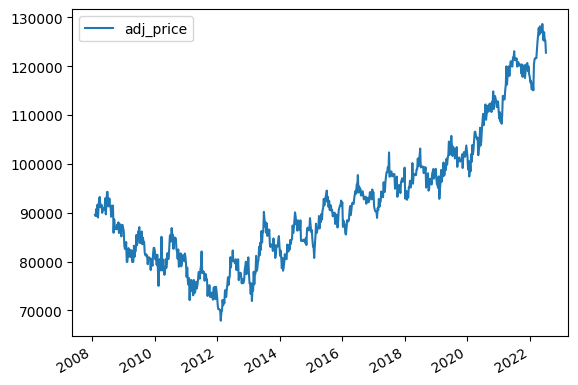

In [148]:
price_data.plot.line(y="adj_price", use_index=True)

In [149]:
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100


Now,we are gonna set up a target for our machine learning model,the target is to find the estimate value of the house for the next quarter.To acheieve
that we use shift function which helps in pushing the data from the future 3 months back to present.

In [150]:
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [151]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397,126977.462347,121042.815919,None
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636,125284.429516,120918.867035,None


Since we have missing values in the data we need to drop the missing values so that we can train the model.

In [152]:
price_data.dropna(inplace=True)

In [153]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516


Now we are gonna insert a change column which helps in identifying the target of the next quarter.Now we convert the change price into a boolean such that if the change value is 1 then there is difference between next quarter and present and indicating it has gone up,if the value is 0 then it indicates the value has gone down

In [154]:
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

In [155]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1


In [156]:
price_data["change"].value_counts()

change
1    379
0    343
Name: count, dtype: int64

In [157]:
predictors = ["interest", "vacancy", "adj_price", "adj_value"]
target = "change"

### Creating machine learning model

Here, we are considering a random forest classifier model.Next we will import accuracy from accuracy_score module which helps in giving the model what percentage of the time is our model correct.Here min_sample_splits helps in avoiding the overfitting of the data.
To validate our data we use a backtest model.Next we split our data into test and train sets.

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

START = 260
STEP = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [159]:
preds, accuracy = backtest(price_data, predictors, target)

In [160]:
preds

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [161]:
accuracy

0.5952380952380952

This ML model has been performed by Chamarthi Om Naga Sai Mani Pavan

### Visualization based on the model

Here we are plotting a graph where the algorithm is making mistakes in prediction.which helps in understanding where did the data has gone wrong.

In [162]:
pred_match = (preds == price_data[target].iloc[START:])
pred_match[pred_match == True] = "blue"
pred_match[pred_match == False] = "orange"

C:\Users\Pavan\AppData\Local\Temp\ipykernel_61960\486697435.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'blue' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  pred_match[pred_match == True] = "blue"


<Axes: xlabel='index', ylabel='adj_price'>

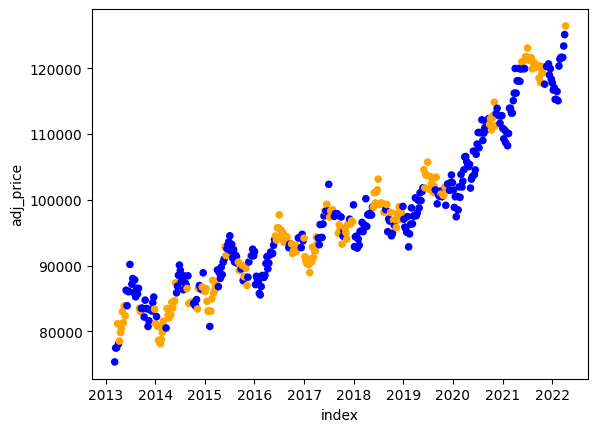

In [163]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)

The model has not been doing well recently when the market is going up but shifts suddenly going down .This kind of diagnostic helps in knowing how to make the model better.To find out how important a column is in the model we use the permutation_importance. This visualiztion has been performed by Nirmal kumar Vegesna.

In [164]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)

In [165]:
result["importances_mean"]

array([0.17451524, 0.15540166, 0.27576177, 0.34861496])

In [166]:
predictors

['interest', 'vacancy', 'adj_price', 'adj_value']

## Future Scope


Try to increase the accuracy of the model.
In coming days to increase accuracy we will add in a few more variables into our model and specific information about recent trend in house prices.